# Initial Demo of Triplet Loss

Taken from: https://www.tensorflow.org/addons/tutorials/losses_triplet
which is included in the repo as: `losses_triplet.ipynb`

We will use (with slight modifications) to demonstrate how to construct a simple model using Semi-Hard Triplet Loss.

In [ ]:
!pip install -q  --no-deps tensorflow-addons~=0.6
!pip install tensorflow_datasets

In [3]:
import io
import numpy as np
import tensorflow as tf

import tensorflow_addons as tfa
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)

train_dataset, test_dataset = tfds.load(name="mnist", split=['train', 'test'], as_supervised=True)

# Build your input pipelines
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.map(_normalize_img)

test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(_normalize_img)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /home/jovyan/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings

])

In [6]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())


In [7]:
# Train the network
history = model.fit(
    train_dataset,
    epochs=5)

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4252
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2782
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2506
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2342
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2266


In [8]:
# Evaluate the network
results = model.predict(test_dataset)

In [12]:
!pip install umap-learn

     |████████████████████████████████| 40kB 1.1MB/s eta 0:00:011
  Created wheel for umap-learn: filename=umap_learn-0.3.10-cp37-none-any.whl size=38881 sha256=2724b8c176aa18b260c20d291e2194a27dcfc4578e1fb73d0feecfd9bbe3a849
  Stored in directory: /home/jovyan/.cache/pip/wheels/d0/f8/d5/8e3af3ee957feb9b403a060ebe72f7561887fef9dea658326e
Successfully built umap-learn


In [14]:
import umap

reducer = umap.UMAP()

In [15]:
embedding = reducer.fit_transform(results)
embedding.shape

/opt/conda/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../opt/conda/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/opt/conda/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../opt/conda/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parall

(10000, 2)

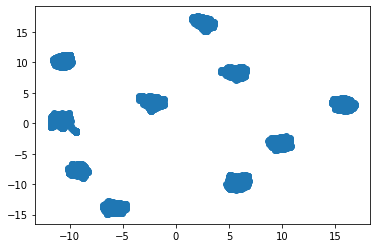

In [16]:
plt.scatter(embedding[:,0], embedding[:,1])